# Exercise 1:

### The file ```AMZN_options.csv``` contains options data for amazon. For those of you not familiar with option data, an option is a financial derivatives that pays at expiration time $T$ and strike $K>0$:

$$C(K,T)=(S_T-K)_+ \text{  if a call option}$$
$$P(K,T)=(K-S_T)_+ \text{  if a put option}$$

It is well known, that Put-Call parity implies the following relation:

$$C(K,T)-P(K,T)=S(T)-K\cdot DF(T)$$
where $S(T)$ is the underlying price and $DF(T)$ is the discount factor.
### a) Compute a new column labelled ```mid_price``` which corresponds to:
$$\text{mid price}=\frac{\text{bid}+\text{ask}}{2}$$
### b) For each available ```expiration_date``` perform a linear regression using the ```mid_price``` only for options ```whose trade_volume>25``` (note that both calls and puts need to satisfy this condition):
$$C(K,T)-P(K,T)=a+b K$$ where $a$ corresponds to $S(T)$ and $b$ corresponds to $DF(T)$.

### you can use ```numpy.polyfit(x, y, deg=1)``` to fit a linear regression and obtain the coefficients
### c) Plot $S(T)$ and  $DF(T)$ as a function of $T$

### Note: you will need to transform dates into time, $T$ in years to to us eyou will need to use the ```datetime``` library. Here goes an example

In [1]:
import pandas as pd
import datetime
option_chain=pd.read_csv('AMZN_options.csv')
current_date=datetime.datetime(2020,11,2,16,0,0)
time_to_maturity_timestamp=pd.to_datetime(option_chain.expiration_date)-current_date

In [2]:
def timestamp_to_year_fraction(x):
    return (x.days*24*3600+x.seconds)/(365*24*3600)

In [3]:
option_chain['T']=time_to_maturity_timestamp.apply(timestamp_to_year_fraction)

In [4]:
option_chain.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type,T
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132


# a)

In [5]:
option_chain['mid_price']=0.5*(option_chain.bid+option_chain.ask)

In [6]:
option_chain.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type,T,mid_price
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1141.275
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1125.550
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1118.625
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1110.725
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1089.175


# b) first we find the different expirations available in the dataset

In [7]:
import numpy as np
maturities=np.unique(option_chain.expiration_date)
print(maturities)

['2020-11-06' '2020-11-13' '2020-11-20' '2020-11-27' '2020-12-04'
 '2020-12-11' '2020-12-18' '2021-01-15' '2021-02-19' '2021-03-19'
 '2021-04-16' '2021-06-18' '2021-07-16' '2021-08-20' '2021-09-17'
 '2021-10-15' '2022-01-21' '2022-06-17' '2023-01-20']


## We will now group_by our dataframe by expiration_date, option_type and strike which gives one record per multi-index combination

In [8]:
grouped_option_chain=option_chain.set_index(["expiration_date","option_type","strike"])

# The following function performs the linear regression
## Note that we need at least 2 points to perform the regression, try/except is helpful here

In [9]:
def put_call_regression(grouped_df,expiration_date,volume_filter,verbose=False):
    """
    inputs:
    grouped_df= dataframe with multi-index [expiration_date, option_type, strike]
    expiration_date
    volume_filter= minimum volume required

    output:
    DF,S= Discount Factor and S coefficient from the Put-Call parity regression

    """
    
    calls=grouped_df.loc[(expiration_date,"C"),["mid_price","volume"]]
    puts=grouped_df.loc[(expiration_date,"P"),["mid_price","volume"]]
    #apply volume filters AND mid_pice check
    
    calls=calls.loc[(calls.volume>volume_filter)]
    puts=puts.loc[(puts.volume>volume_filter)]
    
    # join dataframes by common strikes
    
    joined_df=calls.join(puts,how="inner",lsuffix="_call",rsuffix="_put")
    
    joined_df["call_minus_put"]=joined_df.mid_price_call-joined_df.mid_price_put
    
    assert(len(joined_df)>1) # Assert we have at least 2 samples, otherwise a linear fit won't work
    
    #perform regression
    result=np.polyfit(x=joined_df.index,y=joined_df.call_minus_put,deg=1)
    DF_T=-result[0]
    S_T=result[1]
    if verbose:
        print(expiration_date,":",len(joined_df),"samples | DF:",DF_T, "| S_0:",S_T)
    return DF_T,S_T
    

In [10]:
DFs=[]
Ss=[]
processed_maturites=[]
for maturity in maturities:
    try:
        DF,S=put_call_regression(grouped_option_chain,maturity,25)
        DFs.append(DF)
        Ss.append(S)
        processed_maturites.append(maturity)
    except:
        pass

### Finally we plot results

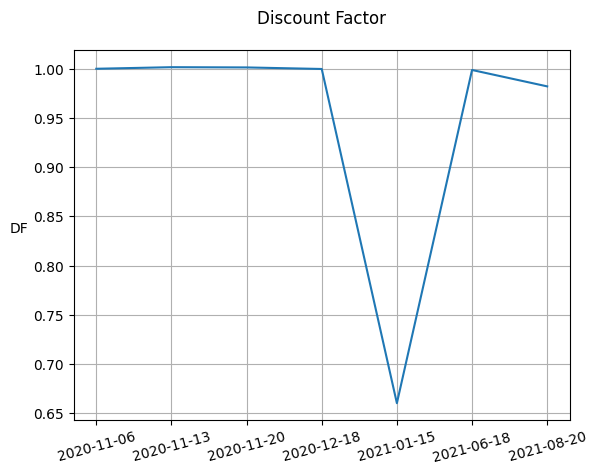

In [11]:
import matplotlib.pyplot as plt
plt.title("Discount Factor",y=1.05)
plt.plot(processed_maturites,DFs)
plt.grid(True)
plt.ylabel('DF',rotation=0,labelpad=10)
plt.xticks(rotation=15)
plt.show()

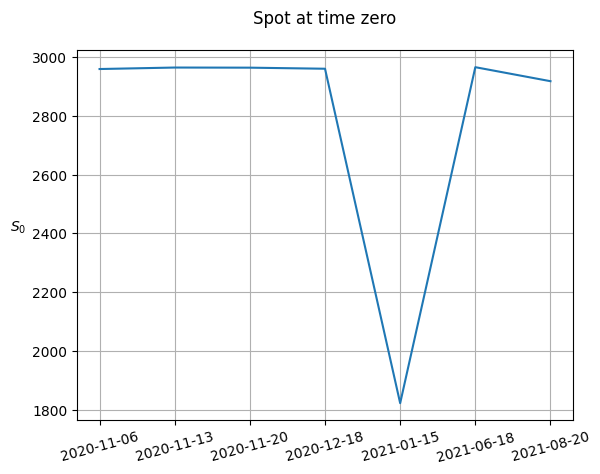

In [12]:
import matplotlib.pyplot as plt
plt.title("Spot at time zero",y=1.05)
plt.plot(processed_maturites,Ss)
plt.grid(True)
plt.ylabel('$S_0$',rotation=0,labelpad=10)
plt.xticks(rotation=15)
plt.show()

### As you (first hand) see, data can be a challenging business. We see some unexpected behaviour right? Why is this happening? let's check our samples

In [13]:
DFs=[]
Ss=[]
processed_maturites=[]
for maturity in maturities:
    try:
        DF,S=put_call_regression(grouped_option_chain,maturity,25,verbose=True)
        DFs.append(DF)
        Ss.append(S)
        processed_maturites.append(maturity)
    except:
        pass

2020-11-06 : 71 samples | DF: 1.0001539574070921 | S_0: 2959.7878219999475
2020-11-13 : 24 samples | DF: 1.0017645372493877 | S_0: 2964.8495445549984
2020-11-20 : 26 samples | DF: 1.0015125381370704 | S_0: 2964.4280293632837
2020-12-18 : 13 samples | DF: 0.9999380255479478 | S_0: 2960.781782727562
2021-01-15 : 9 samples | DF: 0.6601100631997037 | S_0: 1822.4578240178782
2021-06-18 : 2 samples | DF: 0.9989166666666661 | S_0: 2966.066666666663
2021-08-20 : 3 samples | DF: 0.9822500000000038 | S_0: 2918.3625000000125


### Something seems to happen in "2021-01-15" right?

In [14]:
expiration_date="2021-01-15"
volume_filter=25
calls=grouped_option_chain.loc[(expiration_date,"C"),["mid_price","volume"]]
puts=grouped_option_chain.loc[(expiration_date,"P"),["mid_price","volume"]]
#apply volume filters

calls=calls.loc[calls.volume>volume_filter]
puts=puts.loc[puts.volume>volume_filter]



joined_df=calls.join(puts,how="inner",lsuffix="_call",rsuffix="_put")

joined_df["call_minus_put"]=joined_df.mid_price_call-joined_df.mid_price_put

In [15]:
joined_df

,mid_price_call,volume_call,mid_price_put,volume_put,call_minus_put
strike,,,,,
720.0,2241.975,59.0,0.065,27.0,2241.910
860.0,0.000,53.0,0.330,38.0,-0.330
2700.0,382.475,37.0,120.525,62.0,261.950
2900.0,264.150,28.0,203.525,92.0,60.625
3000.0,217.600,378.0,255.250,135.0,-37.650
3050.0,195.900,244.0,282.950,230.0,-87.050
3060.0,191.475,93.0,289.000,66.0,-97.525
3200.0,139.850,403.0,377.100,209.0,-237.250
4500.0,5.200,87.0,1543.800,28.0,-1538.600


### Here we go, so we found that mid_price has a zero value. How can we fix this? Well we can surely check that mid_price is greater than zero!

In [16]:
def put_call_regression(grouped_df,expiration_date,volume_filter,verbose=False):
    """
    inputs:
    grouped_df= dataframe with multi-index [expiration_date, option_type, strike]
    expiration_date
    volume_filter= minimum volume required

    output:
    DF,S= Discount Factor and S coefficient from the Put-Call parity regression

    """
    
    calls=grouped_df.loc[(expiration_date,"C"),["mid_price","volume"]]
    puts=grouped_df.loc[(expiration_date,"P"),["mid_price","volume"]]
    #apply volume filters AND mid_pice check
    
    calls=calls.loc[(calls.volume>volume_filter) & (calls.mid_price>0)]
    puts=puts.loc[(puts.volume>volume_filter) & (puts.mid_price>0)]
    
    # join dataframes by common strikes
    
    joined_df=calls.join(puts,how="inner",lsuffix="_call",rsuffix="_put")
    
    joined_df["call_minus_put"]=joined_df.mid_price_call-joined_df.mid_price_put
    
    assert(len(joined_df)>1) # Assert we have at least 2 samples, otherwise a linear fit won't work
    
    #perform regression
    result=np.polyfit(x=joined_df.index,y=joined_df.call_minus_put,deg=1)
    DF_T=-result[0]
    S_T=result[1]
    if verbose:
        print(expiration_date,":",len(joined_df),"samples | DF:",DF_T, "| S_0:",S_T)
    return DF_T,S_T

In [17]:
DFs=[]
Ss=[]
processed_maturites=[]
for maturity in maturities:
    try:
        DF,S=put_call_regression(grouped_option_chain,maturity,25,verbose=True)
        DFs.append(DF)
        Ss.append(S)
        processed_maturites.append(maturity)
    except:
        pass

2020-11-06 : 71 samples | DF: 1.0001539574070921 | S_0: 2959.7878219999475
2020-11-13 : 24 samples | DF: 1.0017645372493877 | S_0: 2964.8495445549984
2020-11-20 : 26 samples | DF: 1.0015125381370704 | S_0: 2964.4280293632837
2020-12-18 : 13 samples | DF: 0.9999380255479478 | S_0: 2960.781782727562
2021-01-15 : 8 samples | DF: 1.0000362288767664 | S_0: 2962.1559967399503
2021-06-18 : 2 samples | DF: 0.9989166666666661 | S_0: 2966.066666666663
2021-08-20 : 3 samples | DF: 0.9822500000000038 | S_0: 2918.3625000000125


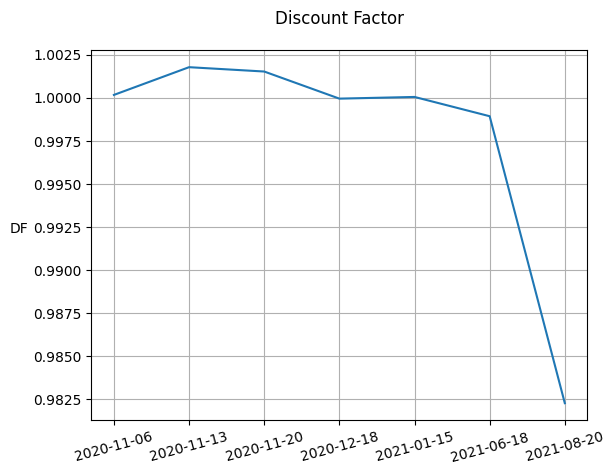

In [18]:
import matplotlib.pyplot as plt
plt.title("Discount Factor",y=1.05)
plt.plot(processed_maturites,DFs)
plt.grid(True)
plt.ylabel('DF',rotation=0,labelpad=10)
plt.xticks(rotation=15)
plt.show()

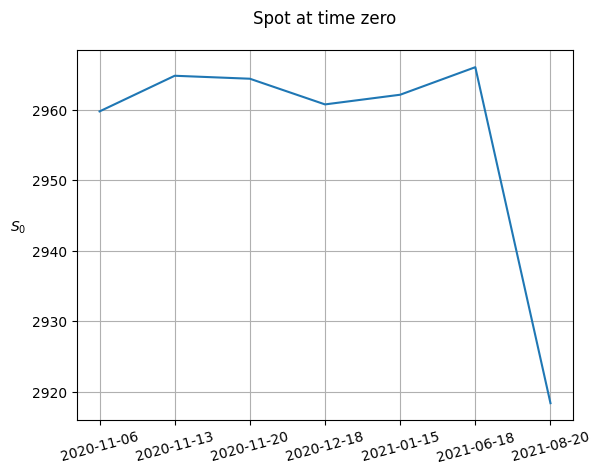

In [19]:
import matplotlib.pyplot as plt
plt.title("Spot at time zero",y=1.05)
plt.plot(processed_maturites,Ss)
plt.grid(True)
plt.ylabel('$S_0$',rotation=0,labelpad=10)
plt.xticks(rotation=15)
plt.show()

### Bottomline here: you will face this kind of "issue" when dealing with data. Be prepared to debug and adapt your code to detect these anomalies. You can of course leave the task without the cleaning part, but as a good future quant you should question these anomalies

# Exercise 2:

### a) Using the forward prices $F(T)$ and Discount Factors $DF(T)$ obtained previously, calculate the implied volatility of each option using the  ```mid_price```. (Note that you will need to use the implied volatility calculation that you did in the Session 2 assignment)

Recall that in the Black-Scholes model, the value of a European Call option on $(S_t)_{t\geq 0}$ is given at inception by,
    $$C^{\mathrm{BS}}(S_0, K, T;\sigma) = S(T)\left(\mathcal{N}(d_{+}) - DF(T)K\mathcal{N}(d_{-})\right)$$
    $$d_{\pm} = \frac{\log\left(\frac{F(T)}{K}\right)}{\sigma\sqrt{T}} \pm\frac{\sigma\sqrt{T}}{2}$$
    
 Where $F(T)=\frac{S(T)}{DF(T)}$
  

### Remark1 : Try to optimize your code to execute efficiently
### Remark2 : Note that some mid prices might lead to arbitrage and the solution for implied volatility might not exist


### a) let us first deal with the fact that we were not able to compute $DF$ and $S$ for all expirations. To fix this we will need to apply some kind of interpolation

In [20]:
dataframe=pd.DataFrame(index=maturities)
dataframe["DF"]=np.nan
dataframe["S"]=np.nan
dataframe.loc[processed_maturites,"DF"]=DFs
dataframe.loc[processed_maturites,"S"]=Ss

## For simplicity we will apply linear interpolation

                  DF            S
2020-11-06  1.000154  2959.787822
2020-11-13  1.001765  2964.849545
2020-11-20  1.001513  2964.428029
2020-11-27  1.001119  2963.516468
2020-12-04  1.000725  2962.604906
2020-12-11  1.000332  2961.693344
2020-12-18  0.999938  2960.781783
2021-01-15  1.000036  2962.155997
2021-02-19  0.999756  2963.133664
2021-03-19  0.999476  2964.111332
2021-04-16  0.999197  2965.088999
2021-06-18  0.998917  2966.066667
2021-07-16  0.990583  2942.214583
2021-08-20  0.982250  2918.362500
2021-09-17  0.982250  2918.362500
2021-10-15  0.982250  2918.362500
2022-01-21  0.982250  2918.362500
2022-06-17  0.982250  2918.362500
2023-01-20  0.982250  2918.362500


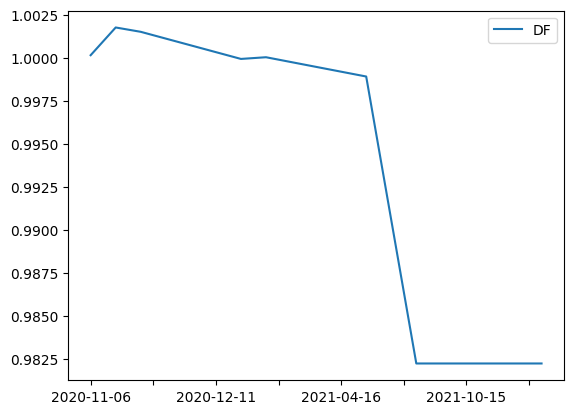

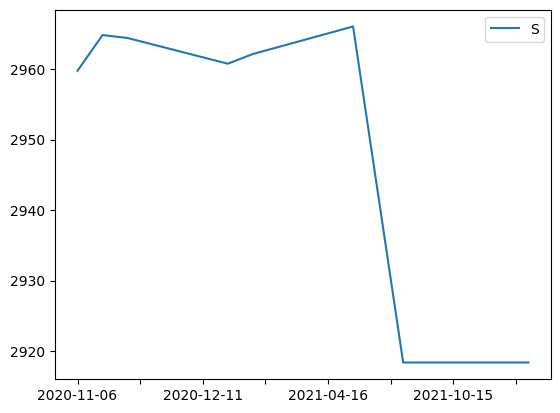

In [21]:
interpolated_df=dataframe.interpolate(method='linear', axis=0, limit_direction='both')
interpolated_df.plot(y='DF')
interpolated_df.plot(y='S')
print(interpolated_df)

# Let us now fill our original option_chain dataframe with $DF$ and $S$

In [22]:
option_chain['DF']=interpolated_df.loc[option_chain.expiration_date,"DF"].values
option_chain['S']=interpolated_df.loc[option_chain.expiration_date,"S"].values
option_chain.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type,T,mid_price,DF,S
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1141.275,1.000154,2959.787822
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1125.550,1.000154,2959.787822
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1118.625,1.000154,2959.787822
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1110.725,1.000154,2959.787822
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.00001,True,REGULAR,USD,2020-11-06,C,0.009132,1089.175,1.000154,2959.787822


### We will create a smaller dataframe with the columns we need to perform Black-Scholes to Implied Volatility trasform

In [23]:
option_chain_reduced=option_chain.loc[:,["S","strike","T","option_type","mid_price","DF",]]
option_chain_reduced.head()

,S,strike,T,option_type,mid_price,DF
0,2959.787822,1820.0,0.009132,C,1141.275,1.000154
1,2959.787822,1830.0,0.009132,C,1125.550,1.000154
2,2959.787822,1840.0,0.009132,C,1118.625,1.000154
3,2959.787822,1850.0,0.009132,C,1110.725,1.000154
4,2959.787822,1870.0,0.009132,C,1089.175,1.000154


In [24]:
### Let us now use apply function

from scipy.optimize import fsolve, root, minimize,brentq
from scipy.stats import norm

def BS_european_option(S0, K,sigma, CP, T,DF):
        """
        inputs:
        S0= underlying price
        K=strike
        sigma= implied volatility
        CP= 1 for call -1 fr put
        DF= Discount Factor
        
        output:
        Black-Scholes option price
        
        """
        
        q=1 if CP=="C" else -1
        sigmtau = sigma*np.sqrt(T)
        k = np.log(K*DF/S0)
        dp = -k / sigmtau + 0.5*sigmtau
        dm = dp - sigmtau
        return S0*(q*norm.cdf(q*dp) - q*DF*np.exp(k)*norm.cdf(q*dm))

def f(sigma, *args):
    S0, K, T, CP,optionPrice,DF = args ## optional arguments, where optionPrice is the Call option price to match
    return (BS_european_option(S0, K, sigma,CP, T,DF)-optionPrice) ## define the objective equation to solve 
def apply_func(x):
     return fsolve(f, x0=0.3, args=((x[0], x[1], x[2], x[3],x[4],x[5] )))[0]
       
    

In [25]:
import time
start_time=time.time()
option_chain['IV']=option_chain_reduced.apply(apply_func,axis=1,raw=True)
print("IV computation took", time.time()-start_time,"seconds")

/home/amuguruza/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/amuguruza/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


IV computation took 15.203125238418579 seconds


### And we are done! 20-ish seconds might seem quick to some, but is fact rather slow. Using the Implied volatility calculator from the cython session gives a massive improvement to this